In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('data/insurance_ML3.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges,price_range
0,19,female,27.900,0,True,southwest,16884.92400,expensive
1,18,male,33.770,1,False,southeast,1725.55230,cheap
2,28,male,33.000,3,False,southeast,4449.46200,cheap
3,33,male,22.705,0,False,northwest,21984.47061,expensive
4,32,male,28.880,0,False,northwest,3866.85520,cheap


In [8]:
y.mean()

13270.422265141257

In [4]:

# Prepare X and y
X = data[['age','bmi','children','smoker']]
y = data['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, 
                                                    random_state = 6) # Holdout


model = DummyRegressor(strategy="mean") # Baseline
model.fit(X_train, y_train) # Calculate value for stratgy
model.score(X_test, y_test) # Score model based on consistently predicting the strategy

-0.001233635021205659

In [10]:
model = LinearRegression().fit(X_train, y_train) # instantiate and fit model 

model.score(X_test, y_test) # Score model

0.773425820295562

In [11]:
y_pred = model.predict(X)

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
import math

mse = mean_squared_error(y, y_pred)

rmse = math.sqrt(mse)

mae = mean_absolute_error(y, y_pred)

rsquared = r2_score(y, y_pred)

max_error = max_error(y, y_pred)

print('MSE =', round(mse, 2))
print('RMSE =', round(rmse, 2))
print('MAE =', round(mae, 2))
print('R2 =', round(rsquared, 2))
print('Max Error =', round(max_error, 2))

MSE = 36776200.68
RMSE = 6064.34
MAE = 4234.0
R2 = 0.75
Max Error = 29184.77


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['price_range'])

print(le.classes_) # to check the order of classes that will be encoded

['cheap' 'expensive']


In [22]:
data['price_range_encoded'] = le.transform(data['price_range'])
data[['price_range', 'price_range_encoded']].head()

,price_range,price_range_encoded
0,expensive,1
1,cheap,0
2,cheap,0
3,expensive,1
4,cheap,0


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

model = LogisticRegression()

# Predict class probabilties
data['proba_cheap'], data['proba_expensive'] =cross_val_predict(model,
                                                                X,
                                                                data['price_range_encoded'],
                                                                cv=5,
                                                                method='predict_proba').T

In [25]:
data['proba_cheap'], data['proba_expensive']

(0       0.072311
 1       0.958116
 2       0.912311
 3       0.933019
 4       0.928463
           ...   
 1333    0.772538
 1334    0.972173
 1335    0.970187
 1336    0.968954
 1337    0.005766
 Name: proba_cheap, Length: 1338, dtype: float64,
 0       0.927689
 1       0.041884
 2       0.087689
 3       0.066981
 4       0.071537
           ...   
 1333    0.227462
 1334    0.027827
 1335    0.029813
 1336    0.031046
 1337    0.994234
 Name: proba_expensive, Length: 1338, dtype: float64)

In [28]:
scores = pd.DataFrame({'threshold':threshold,
                       'precision': precision[:-1],
                       'recall':recall[:-1]}) # Store in a dataframe
scores

,threshold,precision,recall
0,0.023415,0.313901,1.000000
1,0.023590,0.314136,1.000000
2,0.024032,0.314371,1.000000
3,0.024274,0.314607,1.000000
4,0.024641,0.314843,1.000000
...,...,...,...
1332,0.995472,1.000000,0.011905
1333,0.995481,1.000000,0.009524
1334,0.995697,1.000000,0.007143
1335,0.995876,1.000000,0.004762


In [34]:
scores[scores['recall'] >= 0.8]['threshold'].max()

0.3055393000254785

In [35]:
model = LogisticRegression()
model.fit(X, data['price_range_encoded'])

def custom_predict(X, custom_threshold):
    probs = model.predict_proba(X) # Get likelihood of each sample being classified as 0 or 1
    expensive_probs = probs[:, 1] # Only keep expensive likelihoods (1) 
    return (expensive_probs > custom_threshold).astype(int) # Boolean outcome converted to 0 or 1
    
    
updated_preds = custom_predict(X=X, custom_threshold=0.305539) # Update predictions 

print("Recall:", recall_score(data['price_range_encoded'], updated_preds)) # Rerun recall
print("Precision:", precision_score(data['price_range_encoded'], updated_preds)) # Rerun precision
print("F1 Score:", f1_score(data['price_range_encoded'], updated_preds)) # Rerun f1

Recall: 0.8071428571428572
Precision: 0.9287671232876712
F1 Score: 0.8636942675159236


In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Extract associated metrics and thresholds
fpr, tpr, thresholds = roc_curve(data['price_range_encoded'], data['proba_expensive'])

# Compute AUC score
auc_score = roc_auc_score(y_true, y_pred)
auc_score

0.7000000000000001

In [29]:
# precision recall data
precision, recall, threshold = precision_recall_curve(data['price_range_encoded'],
                                                      data['proba_expensive']) 

print(f'precision- {precision[:5]}')
print(f'recall- {recall[:5]}')
print(f'threshold- {threshold[:5]}')

precision- [0.31390135 0.31413613 0.31437126 0.31460674 0.31484258]
recall- [1. 1. 1. 1. 1.]
threshold- [0.0234146  0.02359012 0.02403223 0.02427382 0.02464116]


Text(0.5, 0, 'recall')

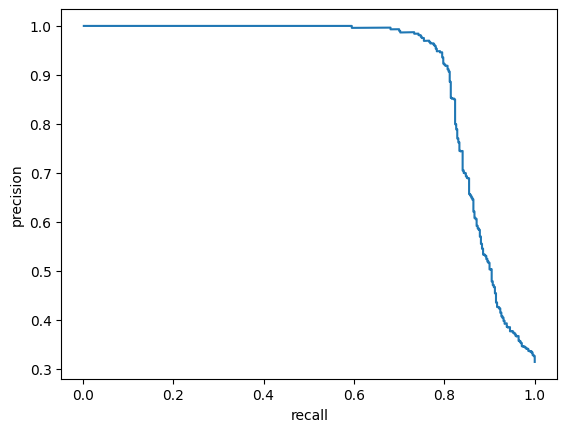

In [30]:
plt.plot(scores['recall'],scores['precision'])
plt.ylabel('precision')
plt.xlabel('recall')

In [ ]:
                                                               data['price_range_encoded'],
                                                                cv=5,
                                                                method='predict_proba').T

# precision recall data
precision, recall, threshold = precision_recall_curve(data['price_range_encoded'],
                                                      data['proba_expensive']) 

print(f'precision- {precision[:5]}')
print(f'recall- {recall[:5]}')
print(f'threshold- {threshold[:5]}')

In [11]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.684932,1.094918,13270.422265
std,14.049960,6.070713,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.336250,0.000000,4740.287150
50%,39.000000,30.495000,1.000000,9382.033000
75%,51.000000,34.600000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
y_pred = model.predict(X)

In [13]:
from sklearn.model_selection import cross_validate
# 5-Fold Cross validate model
model = LinearRegression()
cv_results = cross_validate(model, X, y, cv=5, 
                            scoring=['max_error',
                                     'r2', 
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error']
                           )
pd.DataFrame(cv_results) # Cross validation output

,fit_time,score_time,test_max_error,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,0.032456,0.040009,-24053.301788,0.760959,-4210.447467,-3.714635e+07
1,0.010597,0.008810,-23060.600919,0.708823,-4219.303638,-3.781926e+07
2,0.006085,0.003453,-26395.712047,0.776167,-4026.911043,-3.285122e+07
3,0.004194,0.010393,-23282.860901,0.731409,-4297.280431,-3.987217e+07
4,0.006212,0.006945,-29700.376643,0.756647,-4218.673537,-3.696269e+07


In [15]:
cv_results['test_neg_mean_absolute_error'].mean()

-4194.5232230820275

In [17]:
y_test = [0, 1, 0, 0, 1, 0, 1, 1, 0, 1] # actual truths
preds = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1] # predictions

results_df = pd.DataFrame({"actual": y_test,
                           "predicted": preds}) #Store results in a dataframe

results_df

,actual,predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,1,1
5,0,1
6,1,1
7,1,1
8,0,1
9,1,1


In [18]:
confusion_matrix = pd.crosstab(index= results_df['actual'],
                               columns = results_df['predicted'])

In [19]:
confusion_matrix

predicted,0,1
actual,,
0,3,2
1,1,4


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = [0, 1, 0, 0, 1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

print('Accuracy =', round(accuracy_score(y_true, y_pred), 2)) # Accuracy

print('Precision =', round(precision_score(y_true, y_pred), 2)) # Precision

print('Recall =', round(recall_score(y_true, y_pred), 2)) # Recall

print('F1 score =', round(f1_score(y_true, y_pred), 2)) # F1 score

Accuracy = 0.7
Precision = 0.67
Recall = 0.8
F1 score = 0.73


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
import math

mse = mean_squared_error(y, y_pred)

rmse = math.sqrt(mse)

mae = mean_absolute_error(y, y_pred)

rsquared = r2_score(y, y_pred)

max_error = max_error(y, y_pred)

print('MSE =', round(mse, 2))
print('RMSE =', round(rmse, 2))
print('MAE =', round(mae, 2))
print('R2 =', round(rsquared, 2))
print('Max Error =', round(max_error, 2))

MSE = 36776200.68
RMSE = 6064.34
MAE = 4234.0
R2 = 0.75
Max Error = 29184.77


In [12]:
from sklearn.model_selection import cross_validate
# 5-Fold Cross validate model
model = LinearRegression()
cv_results = cross_validate(model, X, y, cv=5, 
                            scoring=['max_error',
                                     'r2', 
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error']
                           )
pd.DataFrame(cv_results) # Cross validation output

,fit_time,score_time,test_max_error,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,0.118324,0.002738,-24053.301788,0.760959,-4210.447467,-3.714635e+07
1,0.007794,0.002597,-23060.600919,0.708823,-4219.303638,-3.781926e+07
2,0.002859,0.002472,-26395.712047,0.776167,-4026.911043,-3.285122e+07
3,0.002771,0.003704,-23282.860901,0.731409,-4297.280431,-3.987217e+07
4,0.002948,0.002245,-29700.376643,0.756647,-4218.673537,-3.696269e+07


In [13]:
cv_results['test_r2'].mean() # Cross validation results


0.7468009563921238

In [18]:
y_test = [0, 1, 0, 0, 1, 0, 1, 1, 0, 1] # actual truths
preds = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1] # predictions

results_df = pd.DataFrame({"actual": y_test,
                           "predicted": preds}) #Store results in a dataframe

confusion_matrix = pd.crosstab(index= results_df['actual'],
                               columns = results_df['predicted'])

In [19]:
confusion_matrix

predicted,0,1
actual,,
0,3,2
1,1,4


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = [0, 1, 0, 0, 1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

print('Accuracy =', round(accuracy_score(y_true, y_pred), 2)) # Accuracy

print('Precision =', round(precision_score(y_true, y_pred), 2)) # Precision

print('Recall =', round(recall_score(y_true, y_pred), 2)) # Recall

print('F1 score =', round(f1_score(y_true, y_pred), 2)) # F1 score

Accuracy = 0.7
Precision = 0.67
Recall = 0.8
F1 score = 0.73


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['price_range'])

print(le.classes_) # to check the order of classes that will be encoded

data['price_range_encoded'] = le.transform(data['price_range'])
data[['price_range', 'price_range_encoded']].head()

['cheap' 'expensive']


,price_range,price_range_encoded
0,expensive,1
1,cheap,0
2,cheap,0
3,expensive,1
4,cheap,0


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

model = LogisticRegression()

# Predict class probabilties
data['proba_cheap'], data['proba_expensive'] =cross_val_predict(model,
                                                                X,
                                                                data['price_range_encoded'],
                                                                cv=5,
                                                                method='predict_proba').T

# precision recall data
precision, recall, threshold = precision_recall_curve(data['price_range_encoded'],
                                                      data['proba_expensive']) 

print(f'precision- {precision[:5]}')
print(f'recall- {recall[:5]}')
print(f'threshold- {threshold[:5]}')

precision- [0.31390135 0.31413613 0.31437126 0.31460674 0.31484258]
recall- [1. 1. 1. 1. 1.]
threshold- [0.0234146  0.02359012 0.02403223 0.02427382 0.02464116]


In [23]:
scores = pd.DataFrame({'threshold':threshold,
                       'precision': precision[:-1],
                       'recall':recall[:-1]}) # Store in a dataframe
scores

,threshold,precision,recall
0,0.023415,0.313901,1.000000
1,0.023590,0.314136,1.000000
2,0.024032,0.314371,1.000000
3,0.024274,0.314607,1.000000
4,0.024641,0.314843,1.000000
...,...,...,...
1332,0.995472,1.000000,0.011905
1333,0.995481,1.000000,0.009524
1334,0.995697,1.000000,0.007143
1335,0.995876,1.000000,0.004762


Text(0.5, 0, 'recall')

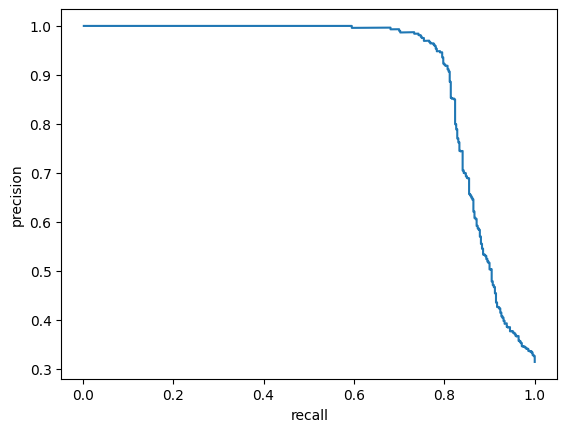

In [24]:
plt.plot(scores['recall'],scores['precision'])
plt.ylabel('precision')
plt.xlabel('recall')

In [26]:
scores[scores['recall'] >= 0.8].threshold.max()

0.3055393000254785

In [27]:
model = LogisticRegression()
model.fit(X, data['price_range_encoded'])

def custom_predict(X, custom_threshold):
    probs = model.predict_proba(X) # Get likelihood of each sample being classified as 0 or 1
    expensive_probs = probs[:, 1] # Only keep expensive likelihoods (1) 
    return (expensive_probs > custom_threshold).astype(int) # Boolean outcome converted to 0 or 1
    
    
updated_preds = custom_predict(X=X, custom_threshold=0.305539) # Update predictions 

print("Recall:", recall_score(data['price_range_encoded'], updated_preds)) # Rerun recall
print("Precision:", precision_score(data['price_range_encoded'], updated_preds)) # Rerun precision
print("F1 Score:", f1_score(data['price_range_encoded'], updated_preds)) # Rerun f1

Recall: 0.8071428571428572
Precision: 0.9287671232876712
F1 Score: 0.8636942675159236


R2 vs MSE, RMSE, MAE, Max Error

R2 can be represented as a value between 0-1 while MSE, RMSE, MAE, Max Error has arbitrary values, and a value between 0-1 can be more informative in model evaluation

precision : number of correct results divided by the number of all returned results.

True Positve | True Postive + False Positive 

recall : number of correct results divided by the number of results that should have been returned

True Positve | True Positive + False Negative

Example: bot detection model for social media network

low precision : more false positive -> more real users identified as bots

Example: detection model for covid cases

low recall : false negative -> more covid cases identified as non covid